## Esercitazione 7 -  9 Aprile 2024

In [46]:
import numpy as np
from numpy.linalg import eigvals, norm, inv
from math import inf, cos, sin
import matplotlib.pyplot as plt

Scrivere la function `NewtonRaphson_corde.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.

In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

In [62]:
def newtonraphson_corde(fname, jacname, x0, tolx, tolf, nmax):
    # valutare J(xk-1), per il metodo delle corde si utilizza
    # lo stesso Jacobiano J(X0) per tutte le iterazioni k.
    J =  jacname(x0)
    inv_J = inv(J)

    it = 0
    v_xk = [x0]
    xk = x0
    prev_xk = x0
    sk = inf
    fxk = fname(x0)

    # criteri di arresto:
    # - ||X_{k+1}-X_k||/||X_{k}||<= tolx
    # - ||F(Xk+1)|| <= tolf;
    # - it >= nmax
    while norm(fxk) > tolf and (norm(sk) / norm(prev_xk)) > tolx and it < nmax:
        # risolvere J(xk-1)*Sk-1 = -F(xk-1)
        sk =  np.dot(- inv_J, fxk)
        # porre xk = xk-1 + sk-1
        prev_xk = xk
        xk = xk + sk

        fxk = fname(xk)
        v_xk.append(xk)
        it += 1

    return xk, it, v_xk

Scrivere la function `NewtonRaphson_sham.py`, che implementa il metodo di Newton-Raphson con la variante di Shamanskii
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

In [58]:
def newtonraphson_sham(fname, jacname, x0, tolx, tolf, nmax):
    m = 3
    it = 0
    v_xk = [x0]
    xk = x0
    prev_xk = x0
    sk = inf
    fxk = fname(x0)

    # criteri di arresto:
    # - ||X_{k+1}-X_k||/||X_{k}||<= tolx
    # - ||F(Xk+1)|| <= tolf;
    # - it >= nmax
    while norm(fxk) > tolf and (norm(sk) / norm(prev_xk)) > tolx and it < nmax:
        if it % m == 0:
            # Si valuta lo Jacobiano ogni m iterazioni e quindi lo
            # si utilizza per le m iterazioni successive
            J =  jacname(xk)
            inv_J = inv(J)

        # risolvere J(xk-1)*Sk-1 = -F(xk-1)
        sk =  np.dot(- inv_J, fxk)
        # porre xk = xk-1 + sk-1
        prev_xk = xk
        xk = xk + sk

        fxk = fname(xk)
        v_xk.append(xk)
        it += 1

    return xk, it, v_xk

Risolvere i seguenti tre sistemi non lineari:
1) 2x0-cos(x1)=0
sin(x0)+2x1=0

2) x0^2+x1^2-9=0
x0^2+x1*2-2=0

3) 4x0^2+x_1^2^=4
x0+x1=sin(x0-x1)

utilizzando il metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii.
Confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi.

zero_corde [ 0.48640515 -0.2337255 ] it_corde 29
F(zero_code): [-6.21724894e-15  4.10782519e-15]
zero_sham [ 0.48640515 -0.2337255 ] it_sham 7
F(zero_sham): [0. 0.]


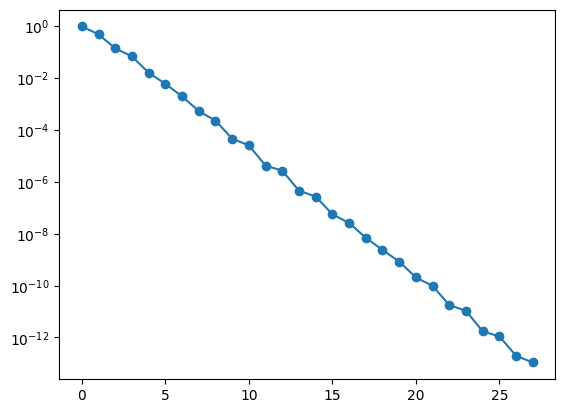

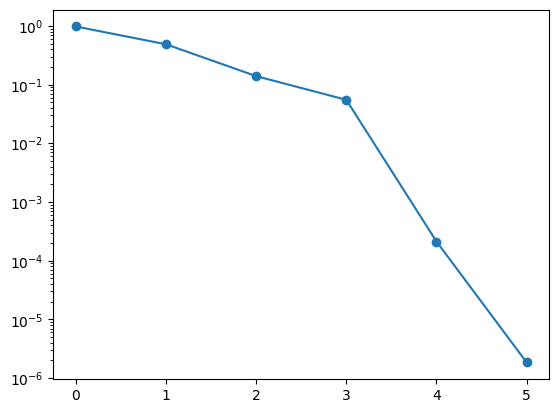

In [60]:
F1 = lambda x: np.array([2 * x[0] - cos(x[1]), sin(x[0]) + 2 * x[1]])
J1 = lambda x: np.array([
    [2, sin(x[1])],
    [cos(x[0]), 2]
])

tolf = tolx = 1e-14
x0 = [1, 1]
NMAX = 100

zero_corde, it_corde, v_xk_corde = newtonraphson_corde(F1, J1, x0, tolx, tolf, NMAX)
print("zero_corde", zero_corde, "it_corde", it_corde)
print("F(zero_code):", F1(zero_corde))

zero_sham, it_sham, v_xk_sham = newtonraphson_sham(F1, J1, x0, tolx, tolf, NMAX)
print("zero_sham", zero_sham, "it_sham", it_sham)
print("F(zero_sham):", F1(zero_sham))

err_cord = np.abs([norm(v_xk_corde[i] - v_xk_corde[i -1]) / norm(v_xk_corde[i-1]) for i in range(1, it_corde)])
err_sham = np.abs([norm(v_xk_sham[i] - v_xk_sham[i -1]) / norm(v_xk_corde[i-1]) for i in range(1, it_sham)])

plt.semilogy(range(it_corde-1), err_cord, '-o')
plt.show()
plt.semilogy(range(it_sham-1), err_sham, '-o')
plt.show()

In [68]:
# x0^2+x1^2-9=0, x0^2+x1*2-2=0
F2 = lambda x: np.array([x[0]**2 + x[1]**2 - 9, x[0]**2 + x[1]*2 - 2])
J2 = lambda x: np.array([
    [2*x[0], 2*x[1]],
    [2*x[0], 2]
])

tolf = tolx = 1e-14
x0 = [0.2, 0.3]
NMAX = 100

zero_corde, it_corde, v_xk_corde = newtonraphson_corde(F2, J2, x0, tolx, tolf, NMAX)
print("zero_corde", zero_corde, "it_corde", it_corde)
print("F(zero_code):", F1(zero_corde))

zero_sham, it_sham, v_xk_sham = newtonraphson_sham(F2, J2, x0, tolx, tolf, NMAX)
print("zero_sham", zero_sham, "it_sham", it_sham)
print("F(zero_sham):", F1(zero_sham))

err_cord = np.abs([norm(v_xk_corde[i] - v_xk_corde[i -1]) / norm(v_xk_corde[i-1]) for i in range(1, it_corde)])
err_sham = np.abs([norm(v_xk_sham[i] - v_xk_sham[i -1]) / norm(v_xk_corde[i-1]) for i in range(1, it_sham)])

plt.semilogy(range(it_corde-1), err_cord, '-o')
plt.show()
plt.semilogy(range(it_sham-1), err_sham, '-o')
plt.show()

J [[0.4 0.6]
 [0.4 2. ]]
zero_corde [nan nan] it_corde 9
F(zero_code): [nan nan]
zero_sham [-19.08083315   3.82842712] it_sham 100
F(zero_sham): [-37.38840919   7.42763331]


/tmp/ipykernel_12161/4197463711.py:2: RuntimeWarning: overflow encountered in scalar power
  F2 = lambda x: np.array([x[0]**2 + x[1]**2 - 9, x[0]**2 + x[1]*2 - 2])


IndexError: list index out of range

## Esercizio 2
Scrivere la function `NewtonRaphson_minimo.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

    Tale function
deve assumere come dati in input:
- grad_name: nome della  funzione vettoriale  che contine il gradiente della funzione di cui calcolare lo zero;
- Hess_name: nome della funzione che calcola l' Hessiana della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.



## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [11]:
def norm_inf(A):
    somma_righe = [np.sum(np.abs(row)) for row in A]
    return max(somma_righe)

def norm_one(A):
    return norm_inf(np.transpose(A))

A = np.array([
    [1, -2, 3],
    [-4, 5, 6]
])
print(A)

print("norma inf A:", norm_inf(A))
print("norma uno A:", norm_one(A))

[[ 1 -2  3]
 [-4  5  6]]
norma inf A: 15
norma uno A: 9


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [15]:
A = np.array([
    [4,-1,6],
    [2,3,-3],
    [1,-2,9/2]
])

def norm2(A: np.matrix):
    M = np.dot(A.transpose(), A)
    # il raggio spettrale è la grandezza dell'autovalore con modulo massimo.
    p = np.max(np.abs(eigvals(M)))
    return np.sqrt(p)

print("norm2 A:", norm2(A))
print("norm A:", norm(A, 2))

norm2 A: 9.056251013341882
norm A: 9.056251013341878
